In [22]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
import sys
import os

# Add the parent directory to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

In [24]:
import pandas as pd

from src.config import TRANSFORMED_DATA_DIR

features_and_targets = pd.read_parquet(TRANSFORMED_DATA_DIR / "tabular_data.parquet")

In [25]:
features = features_and_targets.iloc[:, :-1]
targets = features_and_targets["target"]


In [26]:
features[features['pickup_location_id']==43]

,rides_t-672,rides_t-671,rides_t-670,rides_t-669,rides_t-668,rides_t-667,rides_t-666,rides_t-665,rides_t-664,rides_t-663,...,rides_t-3,rides_t-2,rides_t-1,pickup_hour,pickup_location_id,pickup_location_name,fft_1,fft_2,fft_3,fft_4
13817,92,81,29,15,4,4,3,12,12,23,...,42,38,37,2023-01-29 05:00:00,43,Other,215.0,60.207973,57.0,60.207973
13818,2,0,2,2,0,1,5,10,16,29,...,16,17,10,2023-01-30 05:00:00,43,Other,71.0,12.529964,19.0,12.529964
13819,1,0,0,0,1,4,17,49,54,52,...,33,16,16,2023-01-31 05:00:00,43,Other,115.0,38.013156,17.0,38.013156
13820,3,2,0,0,1,1,11,51,50,60,...,43,34,13,2023-02-01 05:00:00,43,Other,139.0,33.541020,27.0,33.541020
13821,6,0,0,1,0,2,10,61,62,66,...,56,40,25,2023-02-02 05:00:00,43,Other,199.0,49.040799,37.0,49.040799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14149,3,0,1,0,1,6,13,54,106,83,...,31,14,10,2023-12-27 05:00:00,43,Other,99.0,36.619667,17.0,36.619667
14150,6,2,2,0,1,7,8,58,84,90,...,42,24,7,2023-12-28 05:00:00,43,Other,121.0,42.438190,23.0,42.438190
14151,20,7,2,0,3,3,13,54,67,90,...,43,30,17,2023-12-29 05:00:00,43,Other,140.0,32.802439,20.0,32.802439
14152,10,8,3,1,3,0,8,19,35,67,...,69,33,19,2023-12-30 05:00:00,43,Other,279.0,134.629120,103.0,134.629120


In [27]:
print(features["pickup_hour"].dt.tz)


None


In [28]:
from src.plot_utils import plot_aggregated_time_series

plot_aggregated_time_series(features, targets, row_id=3772)

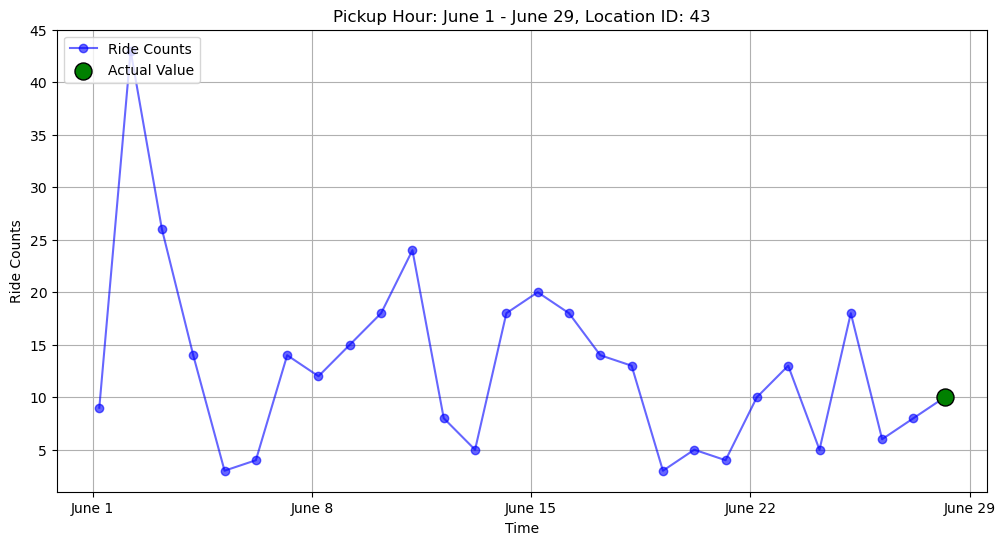

In [30]:
import matplotlib.pyplot as plt
location_id = 43
start_date = "2023-06-01"
end_date = "2023-06-29"

filtered_data = features[
    (features["pickup_location_id"] == location_id) &
    (features["pickup_hour"] >= start_date) &
    (features["pickup_hour"] <= end_date)
].copy()
filtered_data = filtered_data.sort_values(by="pickup_hour")
plt.figure(figsize=(12, 6))
plt.plot(filtered_data["pickup_hour"], filtered_data["rides_t-1"], marker='o', linestyle='-', color='blue', alpha=0.6, label="Ride Counts")
last_index = filtered_data.index[-1]
last_x = filtered_data["pickup_hour"].iloc[-1]
last_y = filtered_data["rides_t-1"].iloc[-1]
plt.scatter(last_x, last_y, color='green', s=150, label="Actual Value", edgecolors='black', zorder=3)
plt.xticks(
    ticks=pd.to_datetime(["2023-06-01", "2023-06-08", "2023-06-15", "2023-06-22", "2023-06-29"]),
    labels=["June 1", "June 8", "June 15", "June 22", "June 29"]
)
plt.xlabel("Time")
plt.ylabel("Ride Counts")
plt.title(f"Pickup Hour: June 1 - June 29, Location ID: {location_id}")
plt.legend(loc="upper left")  # Move legend to avoid overlap
plt.grid()
plt.show()
